In [2]:
import pandas as pd

fuente = "thailandia.csv"

df = pd.read_csv(fuente)

print(df.head())

                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0      NaN      

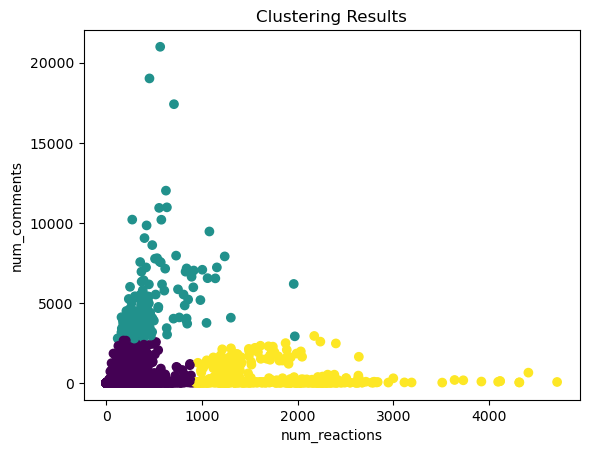

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

fuente = "thailandia.csv"
df = pd.read_csv(fuente)

# Seleccionar las columnas relevantes para el clustering
columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Preprocesar los datos
df_numeric = df[columns]
df_numeric = df_numeric.fillna(0)  # Reemplazar los valores faltantes con ceros

# Instanciar el modelo de K-means con el número de clústeres deseado
k = 3  # Número de clústeres
kmeans_model = KMeans(n_clusters=k, random_state=42)

# Entrenar el modelo
kmeans_model.fit(df_numeric)

# Obtener las etiquetas de clúster asignadas a cada registro
labels = kmeans_model.labels_

# Visualizar los resultados
plt.scatter(df_numeric.iloc[:, 0], df_numeric.iloc[:, 1], c=labels)
plt.xlabel('num_reactions')
plt.ylabel('num_comments')
plt.title('Clustering Results')
plt.show()

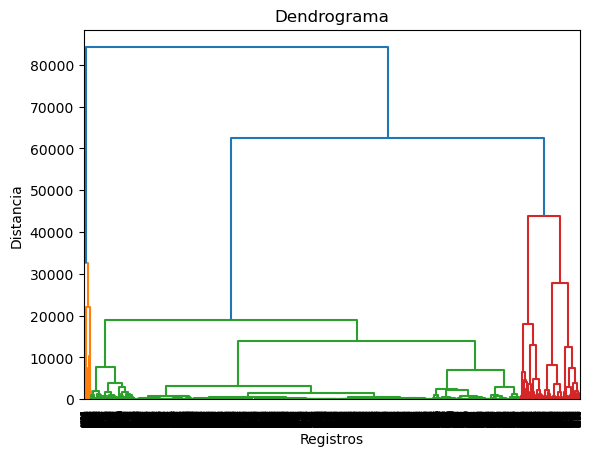

Clúster 0:
                              status_id status_type  status_published  \
92     246675545449582_1492286100888514       photo    12/5/2017 1:25   
93     246675545449582_1491577434292714       photo    12/4/2017 8:28   
99     246675545449582_1474958169287974       video   11/18/2017 1:23   
112    246675545449582_1450141395102985       photo   10/22/2017 0:38   
128    246675545449582_1442942755822849       video  10/14/2017 10:37   
...                                 ...         ...               ...   
6947  1050855161656896_1349785701763839       video    7/25/2017 9:39   
6959  1050855161656896_1346375802104829       video    7/22/2017 4:11   
6962  1050855161656896_1344669528942123       video   7/20/2017 10:50   
6995  1050855161656896_1195433797199031       photo   2/11/2017 11:40   
7001  1050855161656896_1161057800636631       photo    1/9/2017 10:11   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
92              675            

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
fuente = "thailandia.csv"
df = pd.read_csv(fuente)

# Seleccionar las columnas relevantes para el clustering
columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Preprocesar los datos
df_numeric = df[columns]
df_numeric = df_numeric.fillna(0)  # Reemplazar los valores faltantes con ceros

# Instanciar el modelo de clustering jerárquico
n_clusters = 3  # Número de clústeres
clustering_model = AgglomerativeClustering(n_clusters=n_clusters)

# Realizar el clustering
labels = clustering_model.fit_predict(df_numeric)

# Generar la matriz de enlace
linkage_matrix = linkage(df_numeric.values, method='ward')

# Visualizar el dendrograma
dendrogram(linkage_matrix)

# Mostrar el dendrograma
plt.title('Dendrograma')
plt.xlabel('Registros')
plt.ylabel('Distancia')
plt.show()

# Mostrar los resultados de clasificación
for label in set(labels):
    print(f'Clúster {label}:')
    cluster_indices = [i for i, l in enumerate(labels) if l == label]
    print(df.iloc[cluster_indices])
    print('---------------------------')

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


fuente = "thailandia.csv"
df = pd.read_csv(fuente)

# Seleccionar las columnas relevantes para el clustering
columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Preprocesar los datos
df_numeric = df[columns]
df_numeric = df_numeric.fillna(0)  # Reemplazar los valores faltantes con ceros

# Instanciar el modelo de clustering jerárquico
n_clusters = 3  # Número de clústeres
clustering_model = AgglomerativeClustering(n_clusters=n_clusters)

# Realizar el clustering
labels = clustering_model.fit_predict(df_numeric)

# Calcular el rendimiento del clustering mediante la silueta
silhouette_avg = silhouette_score(df_numeric, labels)

print(f"Rendimiento del clustering (silueta): {silhouette_avg}")


Rendimiento del clustering (silueta): 0.7728752135851344


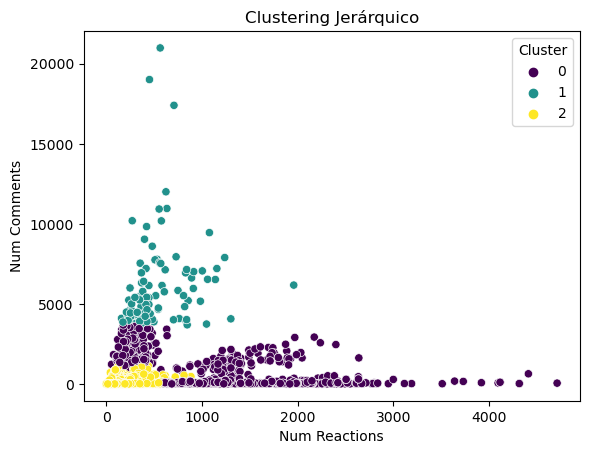

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
fuente = "thailandia.csv"
df = pd.read_csv(fuente)

# Seleccionar las columnas relevantes para el clustering
columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Preprocesar los datos
df_numeric = df[columns]
df_numeric = df_numeric.fillna(0)  # Reemplazar los valores faltantes con ceros

# Instanciar el modelo de clustering jerárquico
n_clusters = 3  # Número de clústeres
clustering_model = AgglomerativeClustering(n_clusters=n_clusters)

# Realizar el clustering
labels = clustering_model.fit_predict(df_numeric)

# Calcular el rendimiento del clustering mediante la silueta
silhouette_avg = silhouette_score(df_numeric, labels)

# Agregar la columna de etiquetas al DataFrame
df['Cluster'] = labels

# Graficar los resultados del clustering
sns.scatterplot(data=df, x='num_reactions', y='num_comments', hue='Cluster', palette='viridis')
plt.title('Clustering Jerárquico')
plt.xlabel('Num Reactions')
plt.ylabel('Num Comments')
plt.show()
